<a href="https://colab.research.google.com/github/myconcordia/INSE6220/blob/main/Principal_Component_Analysis_and_Diagnosis_of_Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Principal Component Analysis and prediction of price of apple stock per day**

**Install Pycaret**

In [1]:
!pip install pycaret==2.3.6


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.5/301.5 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.2/25.2 MB 26.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × pip subprocess to install build dependencies did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Installing build dependencies ... error
error: subprocess-exited-with-error

× pip subprocess to install build dependencies did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


**Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [3]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.5.3
Seaborn version:  0.13.1


**Dataset**

The “apple finance data Set” used for Principle Component Analysis (PCA) and classification models covers daily stock price for two years from 2015 February to 2017 February.

There are 10 attributes with 506 entries and one column for classification.
**0 represents decreasing and 1 represents increasing in stock price.**


All attributes are numerical and they are listed bellow:
The date attribute does not provide any relevant information.

1. AAPL.Open: The opening price of AAPL stock on a given day.
2. AAPL.High: The highest price reached by AAPL stock during the trading day.
3. AAPL.Low: The lowest price reached by AAPL stock during the trading day.
4. AAPL.Close: The closing price of AAPL stock on that specific day.
5. AAPL.Volume: The trading volume, which represents the total number of shares traded on that day.
6. AAPL.Adjusted: The adjusted closing price, which accounts for events such as stock splits and dividends.
7. dn, mavg, up: These column headers are not clearly specified, but they might be related to technical indicators or some other financial metrics.
8. direction: This column seems to indicate the price direction, possibly whether the closing price went up or down on that day.







In [7]:
#read cvs file into dataframe
df = pd.read_csv('/content/finance-charts-apple.csv')
df.head(25)

Date   AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0   17-02-2015  127.489998  128.880005  126.919998  127.830002     63152400   
1   18-02-2015  127.629997  128.779999  127.449997  128.720001     44891700   
2   19-02-2015  128.479996  129.029999  128.330002  128.449997     37362400   
3   20-02-2015  128.619995  129.500000  128.050003  129.500000     48948400   
4   23-02-2015  130.020004  133.000000  129.660004  133.000000     70974100   
5   24-02-2015  132.940002  133.600006  131.169998  132.169998     69228100   
6   25-02-2015  131.559998  131.600006  128.149994  128.789993     74711700   
7   26-02-2015  128.789993  130.869995  126.610001  130.419998     91287500   
8   27-02-2015  130.000000  130.570007  128.240005  128.460007     62014800   
9   02-03-2015  129.250000  130.279999  128.300003  129.089996     48096700   
10  03-03-2015  128.960007  129.520004  128.089996  129.360001     37816300   
11  04-03-2015  129.100006  129.559998  128.320007  128.539993     31666300   
12  05-03-2015  128.580002  128.750000  125.760002  126.410004     56517100   
13  06-03-2015  128.399994  129.369995  126.260002  126.599998     72842100   
14  09-03-2015  127.959999  129.570007  125.059998  127.139999     88528500   
15  10-03-2015  126.410004  127.220001  123.800003  124.510002     68856600   
16  11-03-2015  124.750000  124.769997  122.110001  122.239998     68939000   
17  12-03-2015  122.309998  124.900002  121.629997  124.449997     48362700   
18  13-03-2015  124.400002  125.400002  122.580002  123.589996     51827300   
19  16-03-2015  123.879997  124.949997  122.870003  124.949997     35874300   
20  17-03-2015  125.900002  127.320000  125.650002  127.040001     51023100   
21  18-03-2015  127.000000  129.160004  126.370003  128.470001     65270900   
22  19-03-2015  128.750000  129.250000  127.400002  127.500000     45809500   
23  20-03-2015  128.250000  128.399994  125.160004  125.900002     68695100   
24  23-03-2015  127.120003  127.849998  126.519997  127.209999     37709700   

    AAPL.Adjusted          dn        mavg          up  direction  
0      122.905254  106.741052  117.927667  129.114281          1  
1      123.760965  107.842423  118.940333  130.038244          1  
2      123.501363  108.894245  119.889167  130.884089          0  
3      124.510914  109.785449  120.763500  131.741551          1  
4      127.876074  110.372516  121.720167  133.067817          1  
5      127.078049  111.094869  122.664834  134.234798          0  
6      123.828261  113.211918  123.629667  134.047415          0  
7      125.395469  114.165299  124.282333  134.399367          1  
8      123.510987  114.966848  124.842667  134.718485          0  
9      124.116706  115.877090  125.403667  134.930243          0  
10     124.376308  116.953513  125.955167  134.956820          1  
11     123.587892  118.087425  126.473000  134.858575          0  
12     121.539962  119.104831  126.848667  134.592503          0  
13     121.722637  120.190797  127.228833  134.266870          0  
14     122.241834  121.628977  127.631167  133.633357          0  
15     119.713160  123.116476  127.923500  132.730525          0  
16     117.530609  123.592756  128.003334  132.413911          0  
17     119.655466  123.489456  127.981334  132.473211          1  
18     118.828598  123.045606  127.849000  132.652395          0  
19     120.136203  122.696702  127.728334  132.759965          1  
20     122.145688  122.616033  127.668000  132.719967          1  
21     123.520597  122.606450  127.652167  132.697884          1  
22     122.587966  122.593903  127.624500  132.655098          0  
23     121.049608  122.486593  127.498000  132.509408          0  
24     122.309137  122.674170  127.263334  131.852497          1

In [14]:
len(df.index)

506

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           506 non-null    object 
 1   AAPL.Open      506 non-null    float64
 2   AAPL.High      506 non-null    float64
 3   AAPL.Low       506 non-null    float64
 4   AAPL.Close     506 non-null    float64
 5   AAPL.Volume    506 non-null    int64  
 6   AAPL.Adjusted  506 non-null    float64
 7   dn             506 non-null    float64
 8   mavg           506 non-null    float64
 9   up             506 non-null    float64
 10  direction      506 non-null    int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 43.6+ KB


In [16]:
print("Number of duplicated rows is: ", df.duplicated().sum())

Number of duplicated rows is:  0


In [17]:
print("Number of rows with NaNs is: ", df.isna().any(axis=1).sum())

Number of rows with NaNs is:  0


In [18]:
df.isnull().sum()

Date             0
AAPL.Open        0
AAPL.High        0
AAPL.Low         0
AAPL.Close       0
AAPL.Volume      0
AAPL.Adjusted    0
dn               0
mavg             0
up               0
direction        0
dtype: int64

In [20]:
A = df.drop('Date', axis=1) #doesn't contain any information relevant to the classification task.
A.head(25)

AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  \
0   127.489998  128.880005  126.919998  127.830002     63152400   
1   127.629997  128.779999  127.449997  128.720001     44891700   
2   128.479996  129.029999  128.330002  128.449997     37362400   
3   128.619995  129.500000  128.050003  129.500000     48948400   
4   130.020004  133.000000  129.660004  133.000000     70974100   
5   132.940002  133.600006  131.169998  132.169998     69228100   
6   131.559998  131.600006  128.149994  128.789993     74711700   
7   128.789993  130.869995  126.610001  130.419998     91287500   
8   130.000000  130.570007  128.240005  128.460007     62014800   
9   129.250000  130.279999  128.300003  129.089996     48096700   
10  128.960007  129.520004  128.089996  129.360001     37816300   
11  129.100006  129.559998  128.320007  128.539993     31666300   
12  128.580002  128.750000  125.760002  126.410004     56517100   
13  128.399994  129.369995  126.260002  126.599998     72842100   
14  127.959999  129.570007  125.059998  127.139999     88528500   
15  126.410004  127.220001  123.800003  124.510002     68856600   
16  124.750000  124.769997  122.110001  122.239998     68939000   
17  122.309998  124.900002  121.629997  124.449997     48362700   
18  124.400002  125.400002  122.580002  123.589996     51827300   
19  123.879997  124.949997  122.870003  124.949997     35874300   
20  125.900002  127.320000  125.650002  127.040001     51023100   
21  127.000000  129.160004  126.370003  128.470001     65270900   
22  128.750000  129.250000  127.400002  127.500000     45809500   
23  128.250000  128.399994  125.160004  125.900002     68695100   
24  127.120003  127.849998  126.519997  127.209999     37709700   

    AAPL.Adjusted          dn        mavg          up  direction  
0      122.905254  106.741052  117.927667  129.114281          1  
1      123.760965  107.842423  118.940333  130.038244          1  
2      123.501363  108.894245  119.889167  130.884089          0  
3      124.510914  109.785449  120.763500  131.741551          1  
4      127.876074  110.372516  121.720167  133.067817          1  
5      127.078049  111.094869  122.664834  134.234798          0  
6      123.828261  113.211918  123.629667  134.047415          0  
7      125.395469  114.165299  124.282333  134.399367          1  
8      123.510987  114.966848  124.842667  134.718485          0  
9      124.116706  115.877090  125.403667  134.930243          0  
10     124.376308  116.953513  125.955167  134.956820          1  
11     123.587892  118.087425  126.473000  134.858575          0  
12     121.539962  119.104831  126.848667  134.592503          0  
13     121.722637  120.190797  127.228833  134.266870          0  
14     122.241834  121.628977  127.631167  133.633357          0  
15     119.713160  123.116476  127.923500  132.730525          0  
16     117.530609  123.592756  128.003334  132.413911          0  
17     119.655466  123.489456  127.981334  132.473211          1  
18     118.828598  123.045606  127.849000  132.652395          0  
19     120.136203  122.696702  127.728334  132.759965          1  
20     122.145688  122.616033  127.668000  132.719967          1  
21     123.520597  122.606450  127.652167  132.697884          1  
22     122.587966  122.593903  127.624500  132.655098          0  
23     121.049608  122.486593  127.498000  132.509408          0  
24     122.309137  122.674170  127.263334  131.852497          1

**Exploratory Data Analysis**

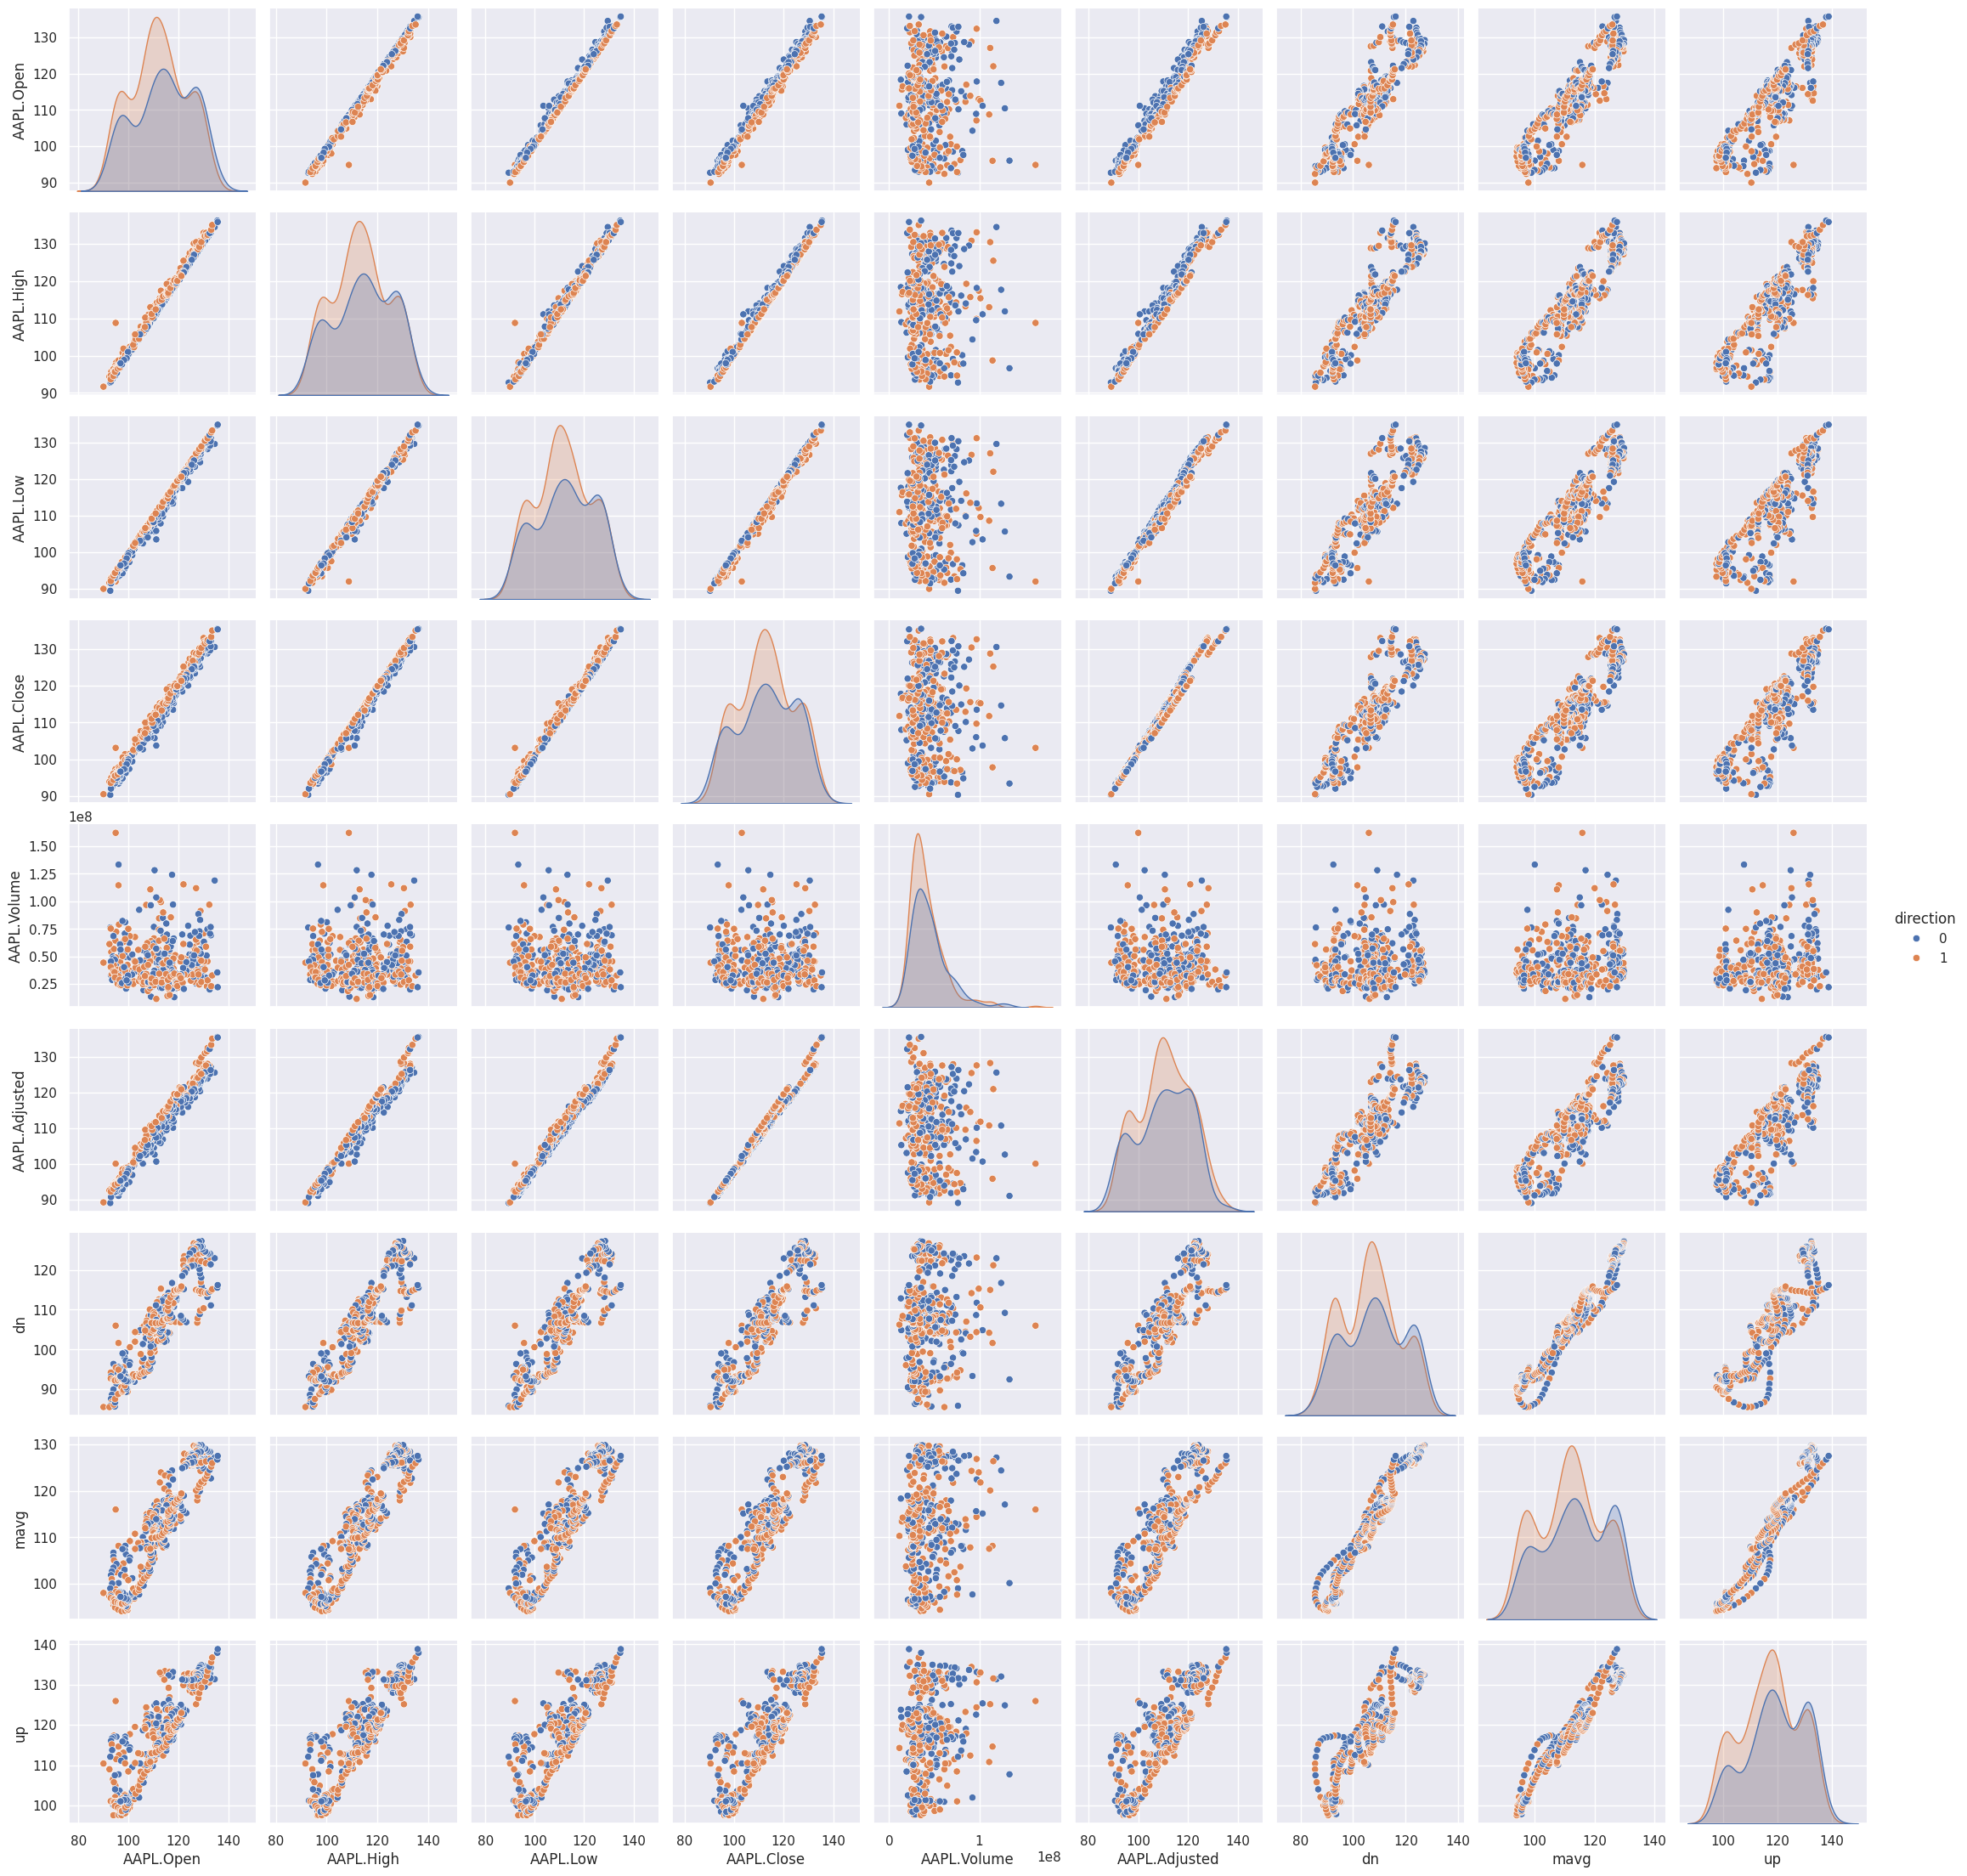

In [22]:
sns.pairplot(A, hue='direction')
plt.show()

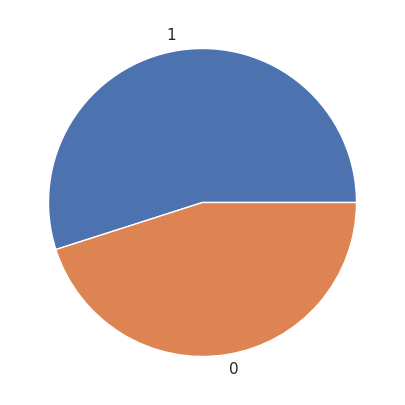

In [26]:
y =A['direction']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

**Data Matrix**

In [27]:
X = A.drop(columns=['direction'])
X.head(10)

AAPL.Open   AAPL.High    AAPL.Low  AAPL.Close  AAPL.Volume  AAPL.Adjusted  \
0  127.489998  128.880005  126.919998  127.830002     63152400     122.905254   
1  127.629997  128.779999  127.449997  128.720001     44891700     123.760965   
2  128.479996  129.029999  128.330002  128.449997     37362400     123.501363   
3  128.619995  129.500000  128.050003  129.500000     48948400     124.510914   
4  130.020004  133.000000  129.660004  133.000000     70974100     127.876074   
5  132.940002  133.600006  131.169998  132.169998     69228100     127.078049   
6  131.559998  131.600006  128.149994  128.789993     74711700     123.828261   
7  128.789993  130.869995  126.610001  130.419998     91287500     125.395469   
8  130.000000  130.570007  128.240005  128.460007     62014800     123.510987   
9  129.250000  130.279999  128.300003  129.089996     48096700     124.116706   

           dn        mavg          up  
0  106.741052  117.927667  129.114281  
1  107.842423  118.940333  130.038244  
2  108.894245  119.889167  130.884089  
3  109.785449  120.763500  131.741551  
4  110.372516  121.720167  133.067817  
5  111.094869  122.664834  134.234798  
6  113.211918  123.629667  134.047415  
7  114.165299  124.282333  134.399367  
8  114.966848  124.842667  134.718485  
9  115.877090  125.403667  134.930243

In [28]:
X.describe().transpose()

count          mean           std           min           25%  \
AAPL.Open      506.0  1.129350e+02  1.128749e+01  9.000000e+01  1.054825e+02   
AAPL.High      506.0  1.139194e+02  1.125189e+01  9.167000e+01  1.063500e+02   
AAPL.Low       506.0  1.119420e+02  1.126369e+01  8.947000e+01  1.046575e+02   
AAPL.Close     506.0  1.129583e+02  1.124474e+01  9.034000e+01  1.056725e+02   
AAPL.Volume    506.0  4.317842e+07  1.985253e+07  1.147590e+07  2.974240e+07   
AAPL.Adjusted  506.0  1.104593e+02  1.053753e+01  8.900837e+01  1.034848e+02   
dn             506.0  1.073114e+02  1.109580e+01  8.550886e+01  9.701124e+01   
mavg           506.0  1.127399e+02  1.059532e+01  9.404717e+01  1.049549e+02   
up             506.0  1.181683e+02  1.067075e+01  9.757272e+01  1.110523e+02   

                        50%           75%           max  
AAPL.Open      1.128900e+02  1.222675e+02  1.356700e+02  
AAPL.High      1.141450e+02  1.234975e+02  1.362700e+02  
AAPL.Low       1.118000e+02  1.216000e+02  1.348400e+02  
AAPL.Close     1.130250e+02  1.221800e+02  1.355100e+02  
AAPL.Volume    3.747460e+07  5.076395e+07  1.622063e+08  
AAPL.Adjusted  1.108211e+02  1.192555e+02  1.355100e+02  
dn             1.073516e+02  1.148122e+02  1.272893e+02  
mavg           1.127998e+02  1.218894e+02  1.298450e+02  
up             1.184725e+02  1.285158e+02  1.388054e+02

**Standardize the Data**

In [29]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

AAPL.Open  AAPL.High  AAPL.Low  AAPL.Close  AAPL.Volume  AAPL.Adjusted  \
0   1.290757   1.330920  1.331074    1.323852     1.007113       1.182275   
1   1.303172   1.322023  1.378175    1.403079     0.086386       1.263562   
2   1.378551   1.344263  1.456380    1.379043    -0.293251       1.238901   
3   1.390966   1.386076  1.431496    1.472513     0.290930       1.334801   
4   1.515121   1.697442  1.574575    1.784077     1.401493       1.654467   
5   1.774070   1.750820  1.708766    1.710192     1.313458       1.578661   
6   1.651690   1.572896  1.440382    1.409309     1.589948       1.269954   
7   1.406042   1.507953  1.303525    1.554410     2.425720       1.418828   
8   1.513347   1.481265  1.448382    1.379934     0.949754       1.239815   
9   1.446836   1.455466  1.453714    1.436015     0.247986       1.297354   

         dn      mavg        up  
0 -0.051452  0.490116  1.026804  
1  0.047907  0.585788  1.113478  
2  0.142795  0.675428  1.192824  
3  0.223194  0.758031  1.273260  
4  0.276155  0.848412  1.397673  
5  0.341321  0.937659  1.507143  
6  0.532307  1.028811  1.489566  
7  0.618314  1.090472  1.522581  
8  0.690625  1.143409  1.552516  
9  0.772741  1.196409  1.572381

In [30]:
X.describe().transpose()

count          mean      std       min       25%       50%  \
AAPL.Open      506.0 -1.965929e-16  1.00099 -2.033906 -0.660898 -0.003991   
AAPL.High      506.0  5.616939e-17  1.00099 -1.979353 -0.673392  0.020066   
AAPL.Low       506.0 -1.572743e-15  1.00099 -1.997060 -0.647366 -0.012621   
AAPL.Close     506.0  7.021173e-16  1.00099 -2.013450 -0.648574  0.005934   
AAPL.Volume    506.0 -8.425408e-17  1.00099 -1.598481 -0.677461 -0.287594   
AAPL.Adjusted  506.0 -6.459479e-16  1.00099 -2.037685 -0.662528  0.034369   
dn             506.0  1.123388e-16  1.00099 -1.966879 -0.929210  0.003630   
mavg           506.0 -8.425408e-16  1.00099 -1.765988 -0.735485  0.005658   
up             506.0 -6.740326e-16  1.00099 -1.932011 -0.667537  0.028536   

                    75%       max  
AAPL.Open      0.827618  2.016170  
AAPL.High      0.852082  1.988348  
AAPL.Low       0.858293  2.034915  
AAPL.Close     0.820898  2.007513  
AAPL.Volume    0.382472  6.001535  
AAPL.Adjusted  0.835571  2.379635  
dn             0.676669  1.802271  
mavg           0.864401  1.616003  
up             0.970661  1.935894

**Observations and variables**

In [31]:
observations = list(A.index)
variables = list(A.columns)

**Box and Whisker Plots**

<ipython-input-32-774acb9c9bc7>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


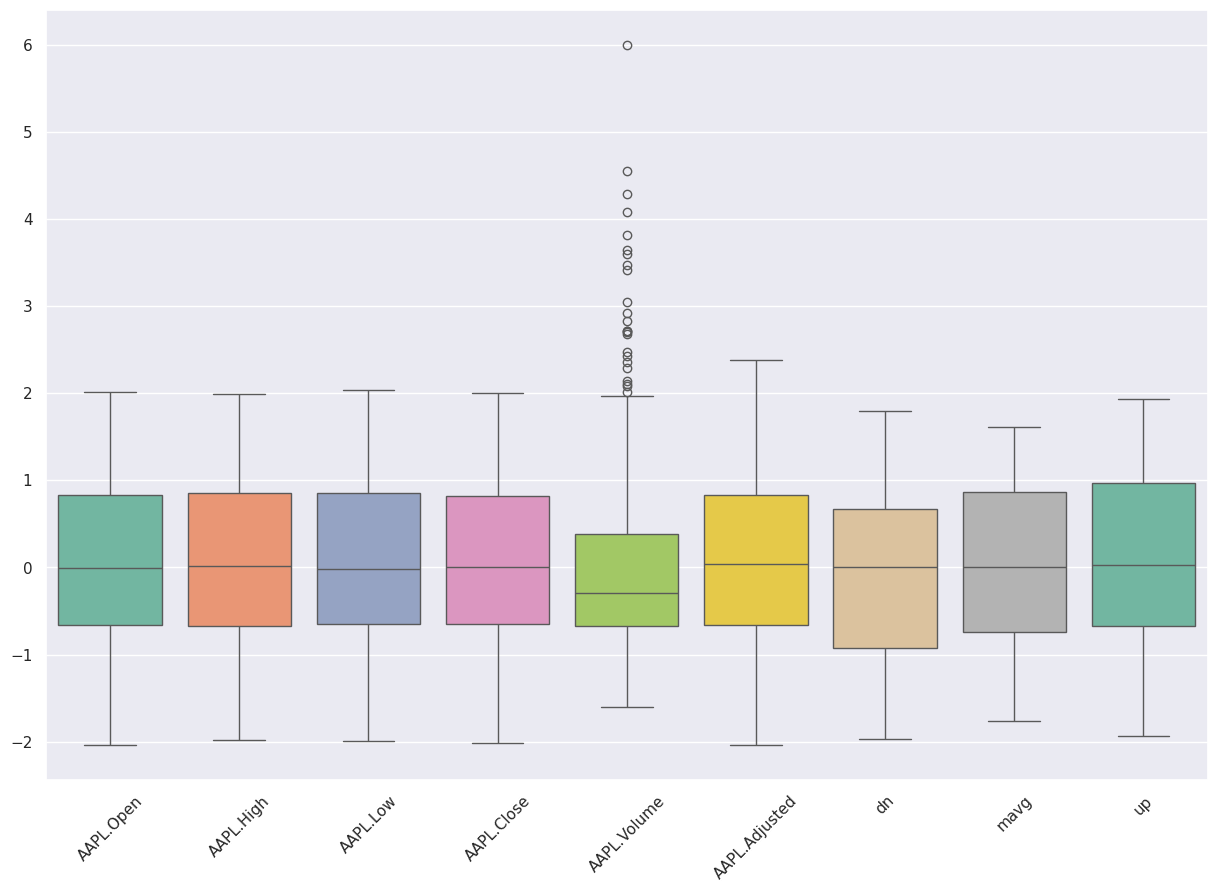

In [32]:
ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

<ipython-input-33-b50664f0e877>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45);


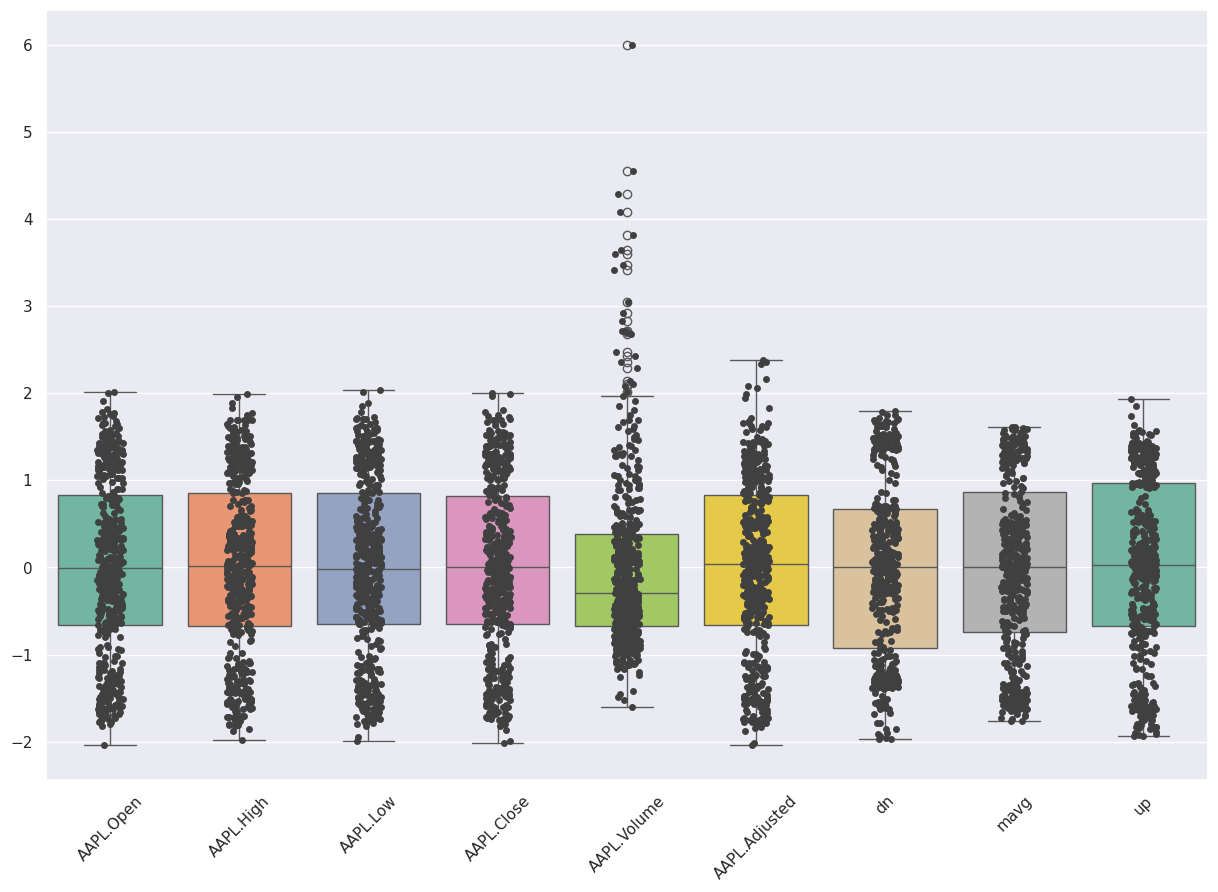

In [33]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()

ax = plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

**Correlation Matrix**

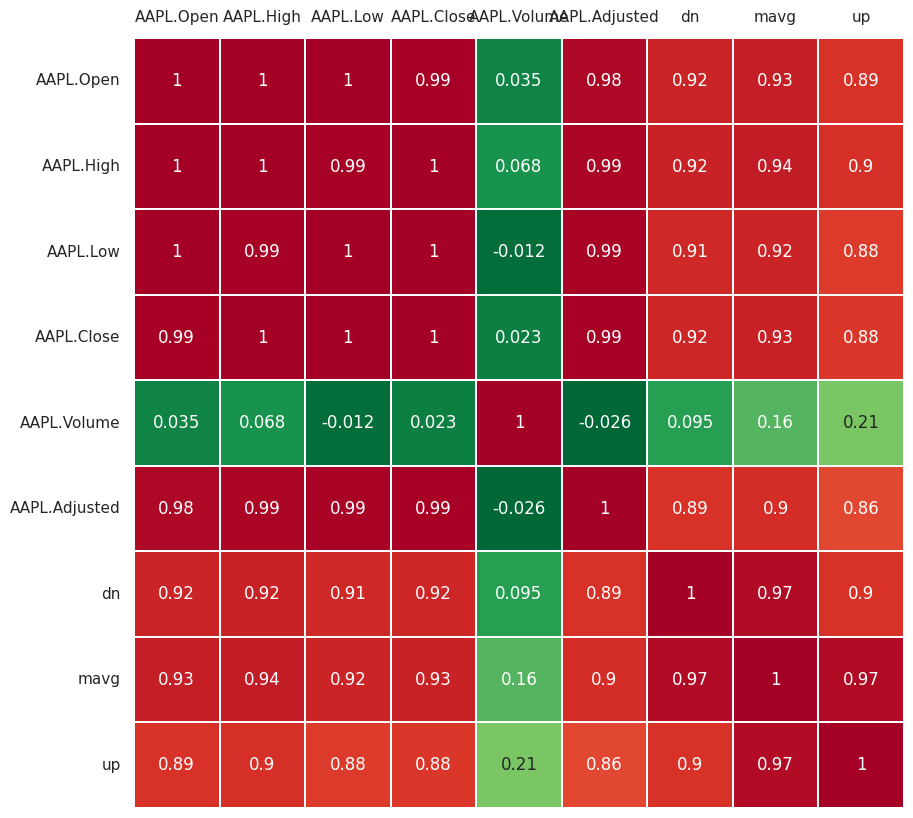

In [34]:
fig1,ax1 = plt.subplots(figsize=(15,10))
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.3, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

# **Principal Component Analysis (PCA)**

Text(0, 0.5, '$Z_2$')

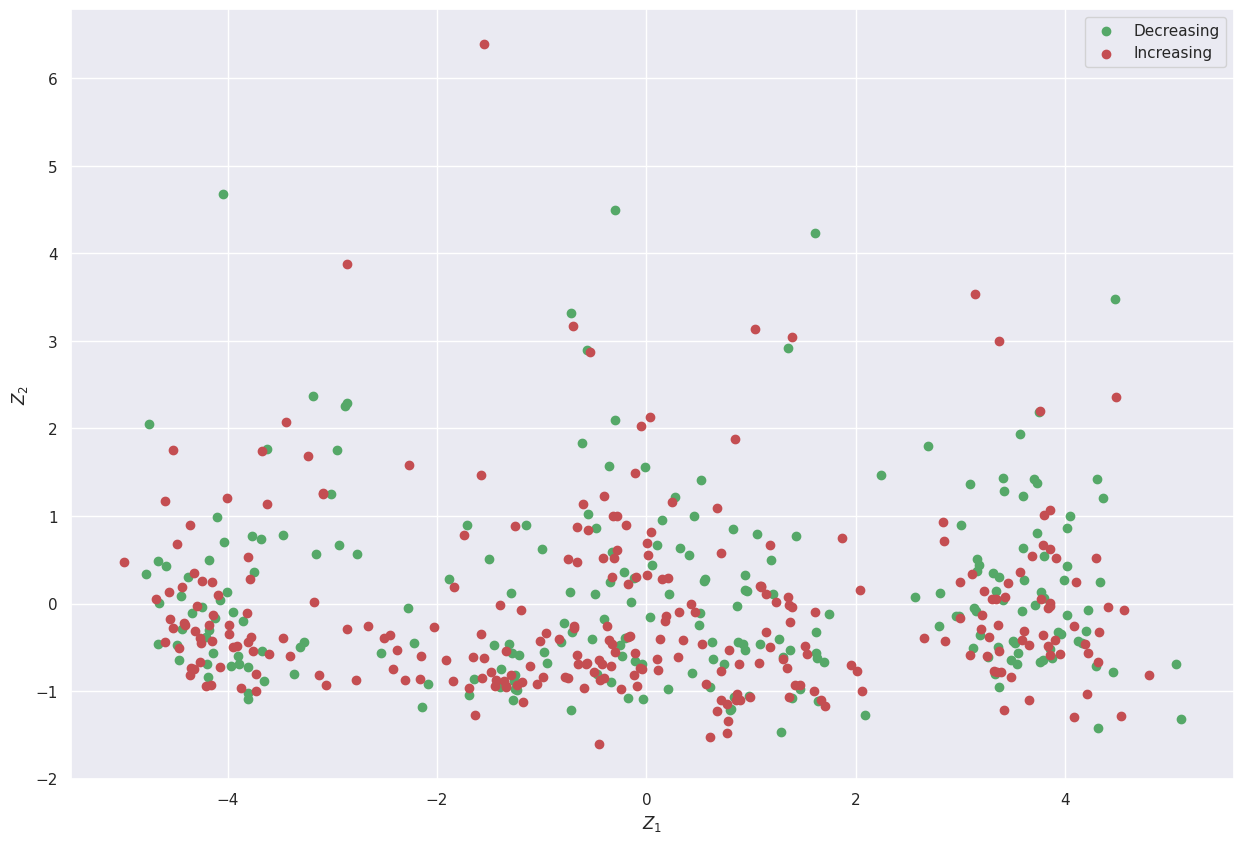

In [35]:
pca = PCA()
Z = pca.fit_transform(X)

# (Malignant)->1,  (Benign)->0

idx_decreasing = np.where(y == 0)
idx_increasing = np.where(y == 1)


plt. figure(figsize=(15,10))
plt.scatter(Z[idx_decreasing,0], Z[idx_decreasing,1], c='g', label='Decreasing')
plt.scatter(Z[idx_increasing,0], Z[idx_increasing,1], c='r', label='Increasing')


plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

**Eigenvectors**

array([[ 3.59054451e-01, -5.57815612e-02,  2.13882750e-01,
         1.99034405e-02, -5.92276506e-01, -4.85263165e-01,
         4.77195184e-02,  4.82987980e-01, -5.73852898e-10],
       [ 3.59955958e-01, -2.44008087e-02,  2.36695477e-01,
         1.56997253e-02, -1.66780911e-01,  2.25601793e-01,
         7.43227719e-01, -4.27159918e-01, -1.09448959e-09],
       [ 3.57792993e-01, -1.03615968e-01,  2.44826132e-01,
         1.38369643e-02, -2.55155844e-01,  8.59881188e-02,
        -6.53747994e-01, -5.48845796e-01,  6.73962366e-10],
       [ 3.58604627e-01, -6.93222035e-02,  2.56688551e-01,
         2.18631824e-02,  1.78128579e-01,  6.86723197e-01,
        -1.21331722e-01,  5.31215790e-01, -1.01861305e-09],
       [ 2.91631449e-02,  9.62341022e-01,  2.52470905e-01,
        -7.38815491e-02,  2.52790115e-02, -2.18762659e-02,
        -5.20120329e-02, -5.13581931e-03,  5.37742231e-11],
       [ 3.53876102e-01, -1.20674001e-01,  3.23554597e-01,
         5.54348787e-02,  7.19725023e-01, -4.832697

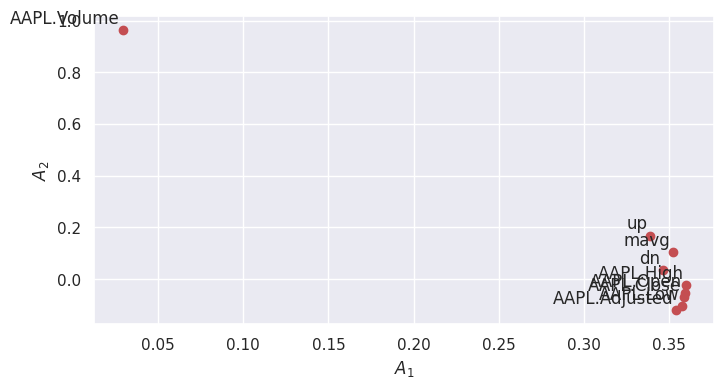

In [36]:
A = pca.components_.T
plt. figure(figsize=(8,4))

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')
A

/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


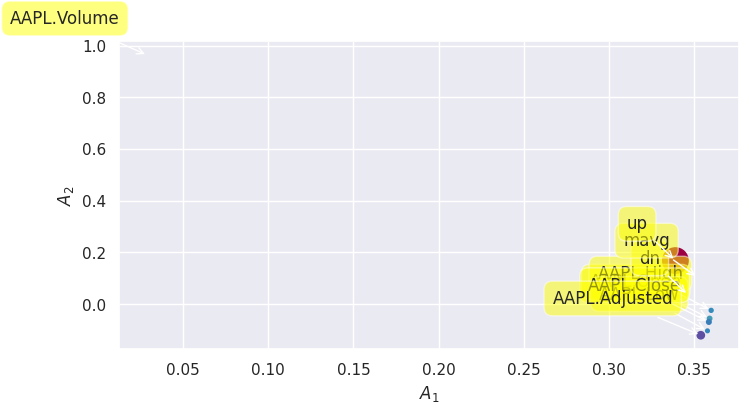

In [37]:
plt. figure(figsize=(8,4))
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

**Scree plot**

array([7.61472792e+00, 1.05879720e+00, 2.26108081e-01, 9.54618654e-02,
       1.55198382e-02, 4.18762779e-03, 2.25880935e-03, 7.60435232e-04,
       5.75208447e-18])

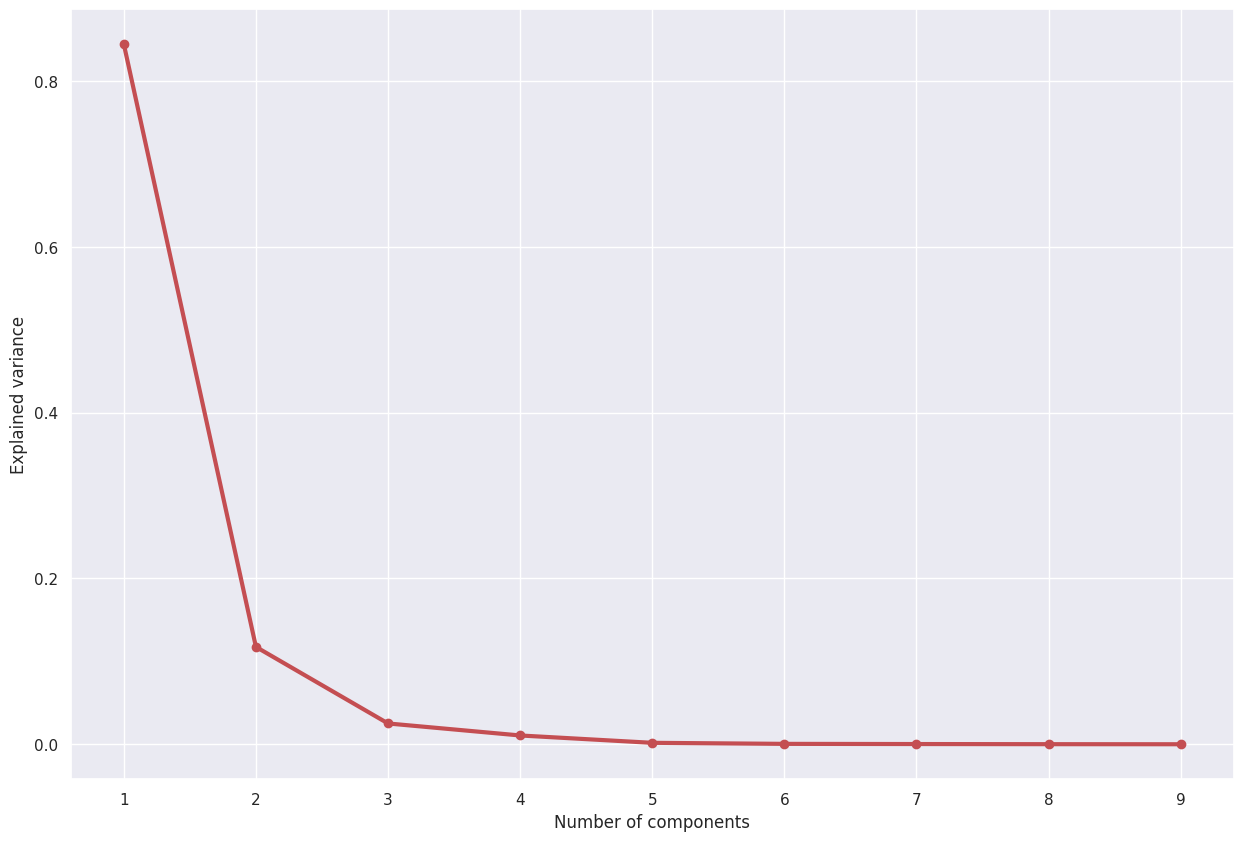

In [38]:
#Eigenvalues
Lambda = pca.explained_variance_

#Scree plot
x = np.arange(len(Lambda)) + 1
plt. figure(figsize=(15,10))
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
Lambda

**Explained Variance**

Text(0, 0.5, 'Cumulative explained variance')

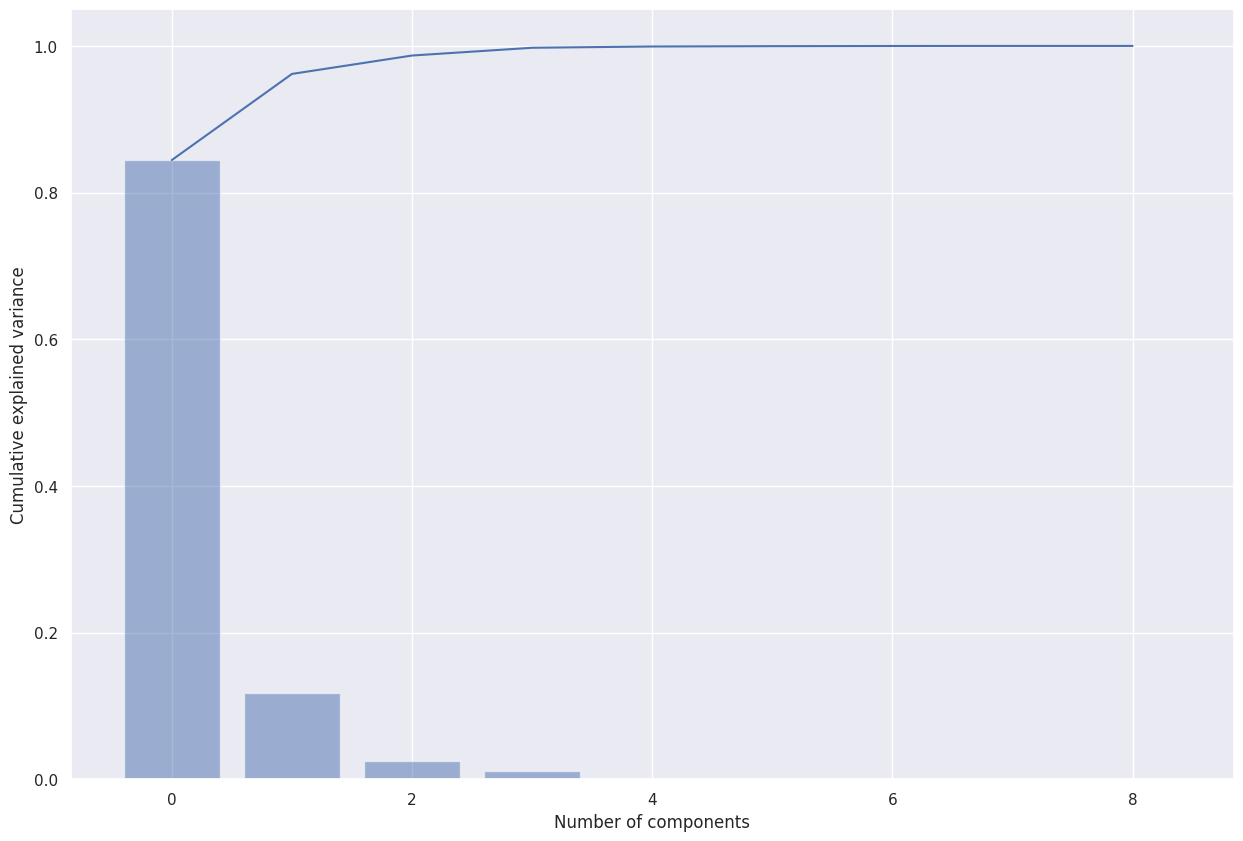

In [39]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt. figure(figsize=(15,10))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

**Biplot**

array([ 7.13604928e-01, -1.65198790e-01, -5.12849923e-01,  5.69919927e-02,
        1.06828843e+00,  9.98064290e-01,  1.37436333e+00,  2.19502281e+00,
        8.01013555e-01,  1.30307569e-01, -3.58954573e-01, -6.39088727e-01,
        6.33936525e-01,  1.41974126e+00,  2.18286992e+00,  1.29124576e+00,
        1.36065509e+00,  3.40849231e-01,  5.03706442e-01, -2.93457399e-01,
        3.63458003e-01,  1.01361270e+00,  6.66545104e-02,  1.22570510e+00,
       -3.18090943e-01, -5.62040080e-01,  4.35459304e-01,  2.45005783e-01,
       -1.46734361e-01,  1.46678366e-01, -8.52724267e-02, -1.41961280e-01,
       -5.83519972e-01, -3.82444091e-01, -4.98964243e-01, -3.56925195e-01,
       -6.04506087e-01, -2.44758854e-01, -4.49053376e-01, -9.47676143e-01,
       -7.86446575e-01, -8.09529482e-01,  3.73815840e-01,  7.71705475e-02,
       -6.46626642e-01, -4.12770082e-01, -5.18812750e-02, -1.31497683e-01,
        2.36065286e+00,  3.47798063e+00,  8.61959626e-01,  1.93139256e+00,
        6.73592429e-01,  

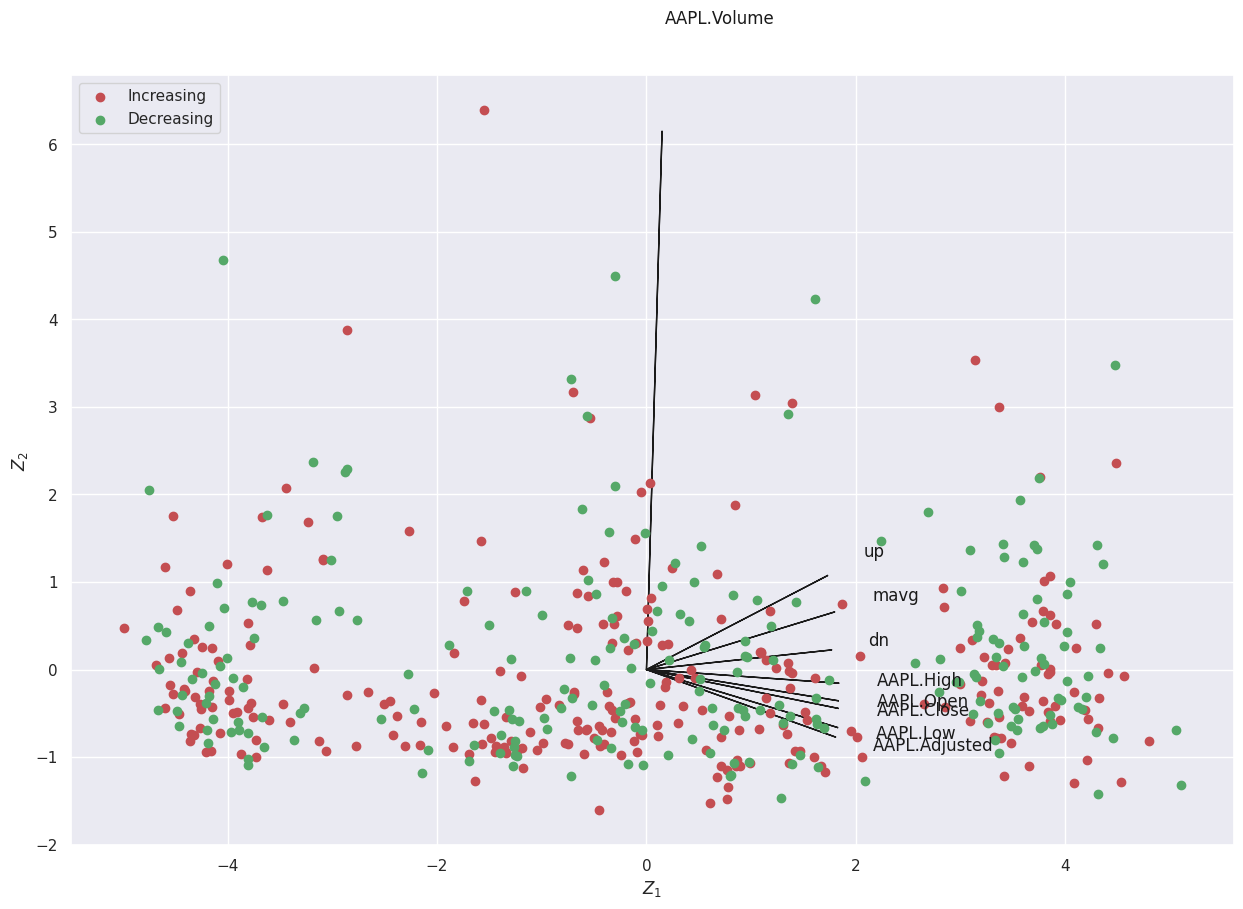

In [41]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0]
A2 = A[:,1]
Z1 = Z[:,0]
Z2 = Z[:,1]

plt. figure(figsize=(15,10))
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_increasing,0], Z[idx_increasing,1], c='r', label='Increasing')
plt.scatter(Z[idx_decreasing,0], Z[idx_decreasing,1], c='g', label='Decreasing')

plt.legend(loc='upper left')
Z1
Z2

# **Using PCA Library**

In [42]:
!pip install pca

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 2.7 MB/s eta 0:00:00


In [43]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [9] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [9] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


**Principal Components**

In [44]:
out['PC']

PC1       PC2
0    2.844033  0.713605
1    2.989943 -0.165199
2    3.115899 -0.512850
3    3.295190  0.056992
4    3.852613  1.068288
..        ...       ...
501  4.310940 -1.416374
502  4.530413 -1.279288
503  4.799445 -0.818124
504  5.056506 -0.694627
505  5.101529 -1.319250

[506 rows x 2 columns]

**Scatter plot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [98.68%] of the variance'}, xlabel='PC1 (84.4% expl.var)', ylabel='PC2 (11.7% expl.var)'>)

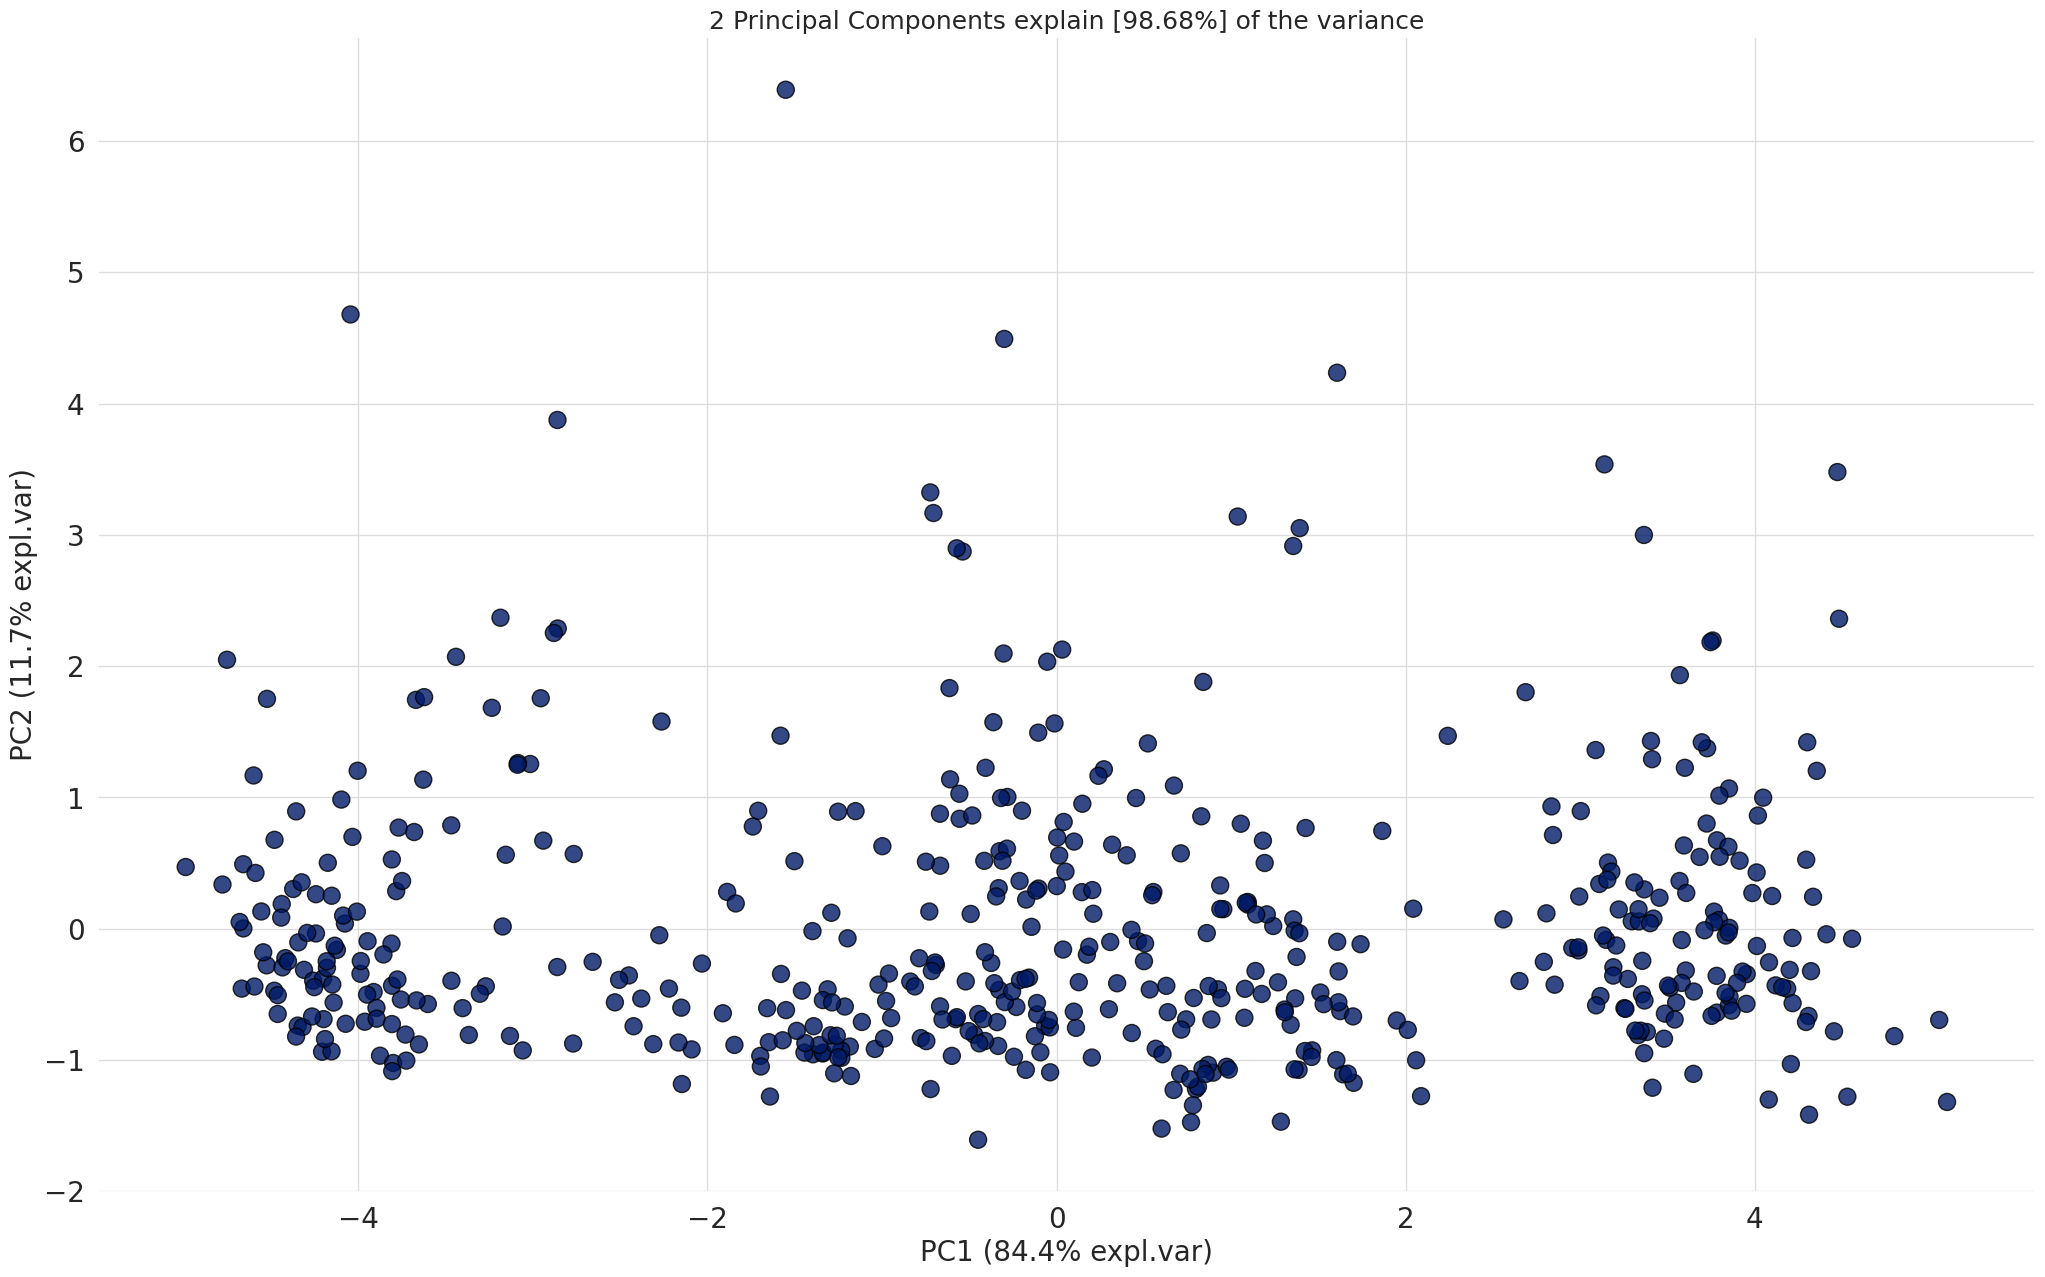

In [45]:
model.scatter(label=True, legend=False)

**Eigenvectors**

In [46]:
A = out['loadings'].T
A

PC1       PC2
AAPL.Open      0.359054 -0.055782
AAPL.High      0.359956 -0.024401
AAPL.Low       0.357793 -0.103616
AAPL.Close     0.358605 -0.069322
AAPL.Volume    0.029163  0.962341
AAPL.Adjusted  0.353876 -0.120674
dn             0.346384  0.035077
mavg           0.352059  0.103002
up             0.338958  0.168074

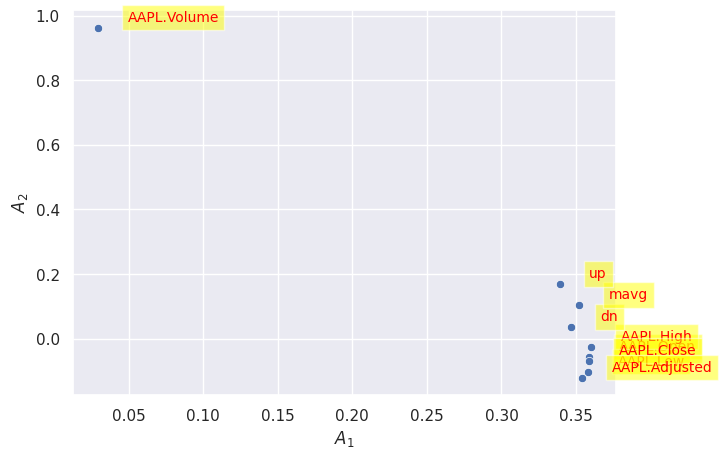

In [47]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))


**Scree Plot**

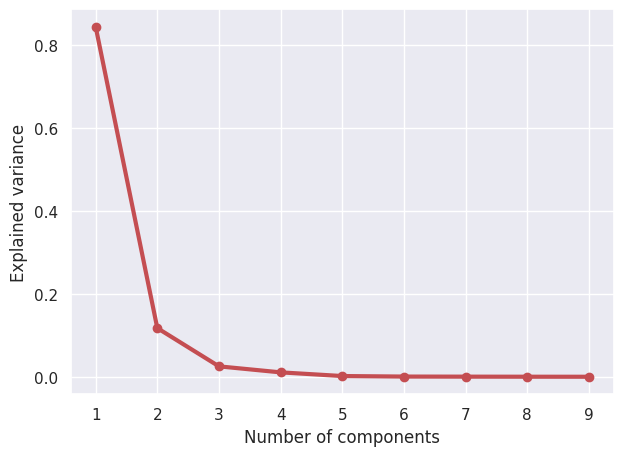

In [48]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance')
plt.show()

**Explained Variance Plot**

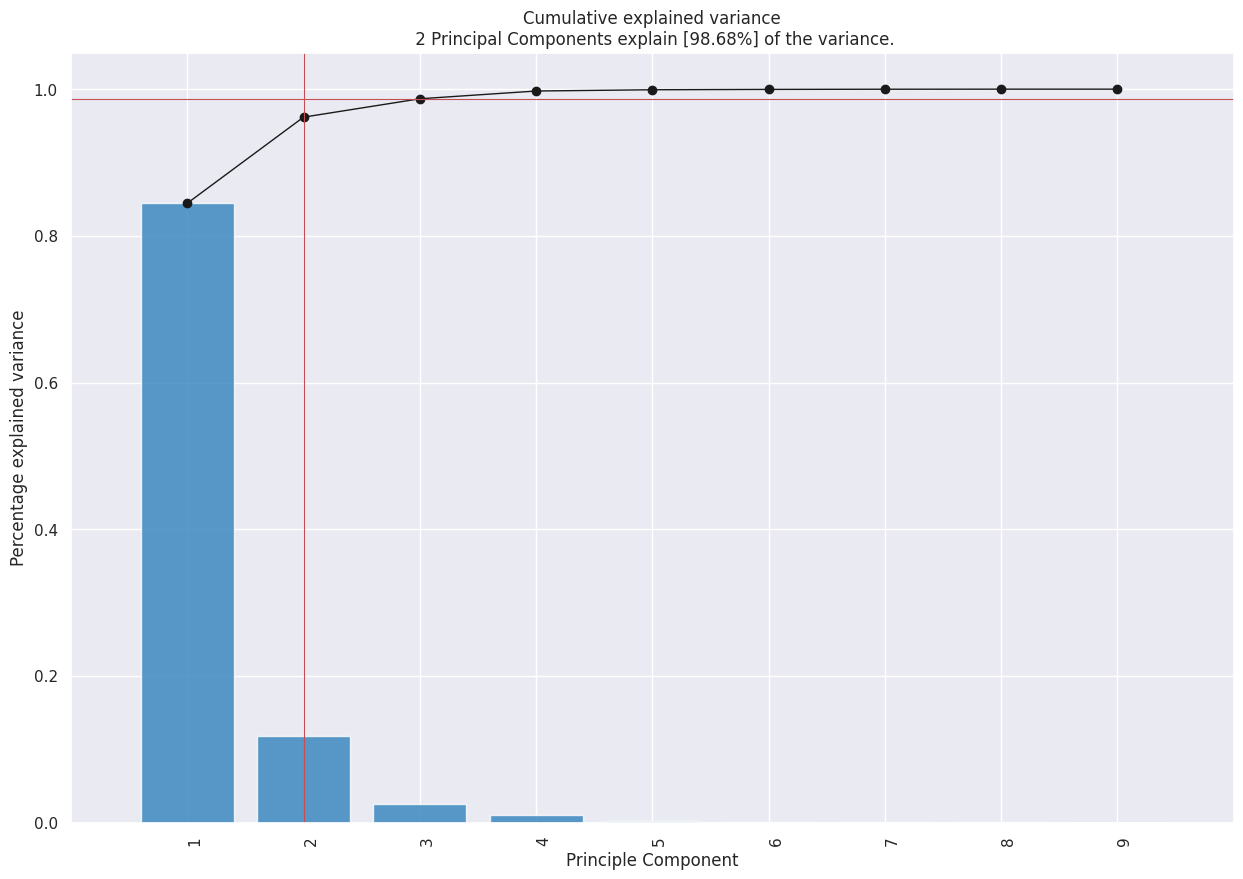

In [49]:
model.plot();

**Biplot**

[scatterd] >INFO> Create scatterplot


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.


(<Figure size 2500x1500 with 1 Axes>,
 <Axes: title={'center': '2 Principal Components explain [98.68%] of the variance'}, xlabel='PC1 (84.4% expl.var)', ylabel='PC2 (11.7% expl.var)'>)

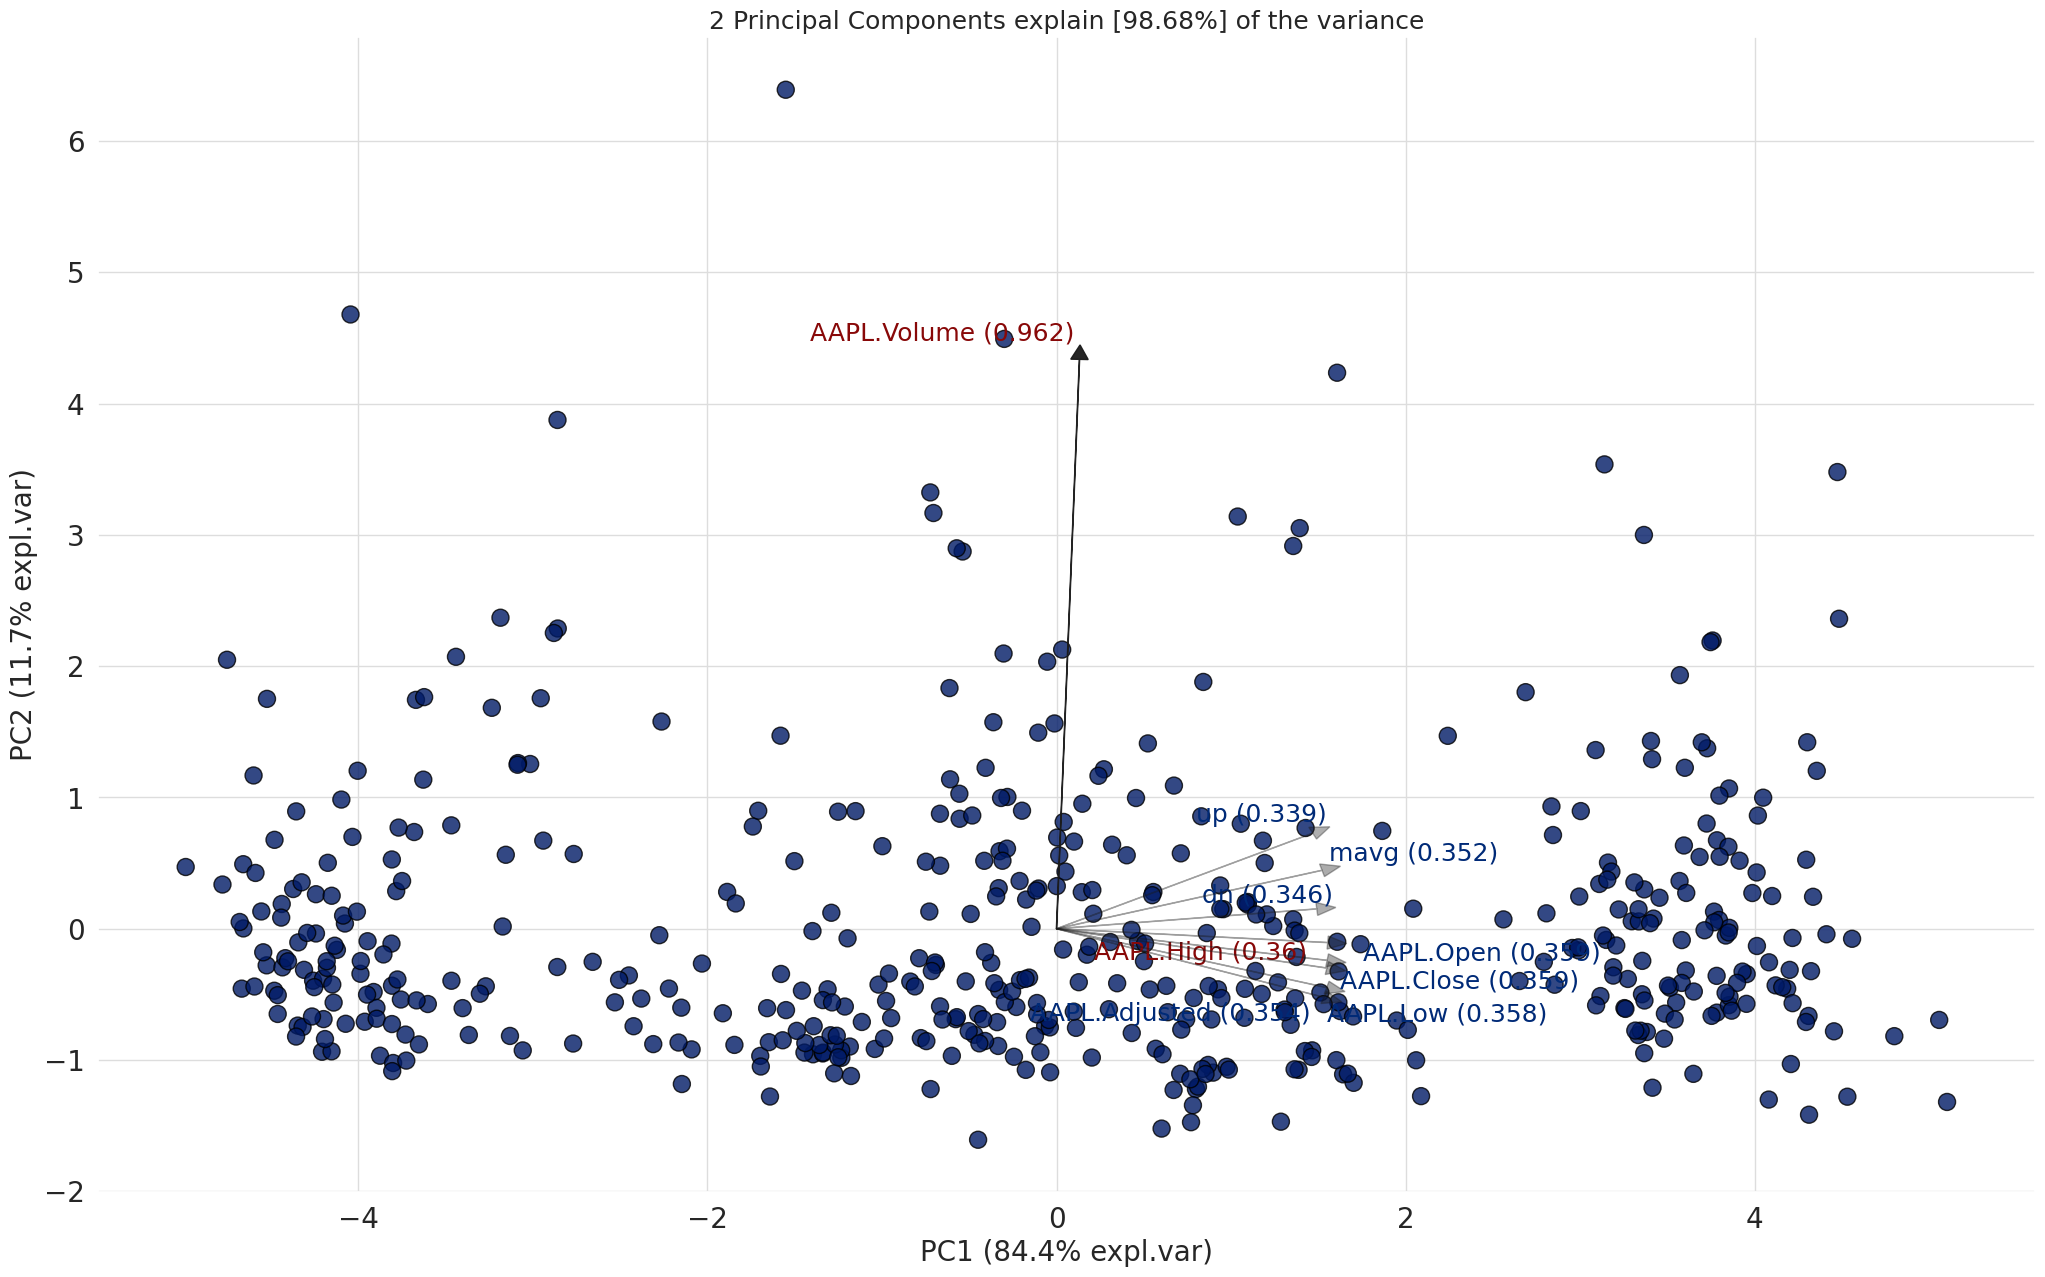

In [53]:
model.biplot(label=False, legend=False, color_arrow='k')

# Classification using Pycaret
At first dataset is split into train and test set with 70% and 30% ratio respectively. Then using the PyCaret compare_models() function, the models which shows the highest accuracy on the original dataset can be found.
Before applying PCA, the output from compare_models() function shows that Ridge Classifier, Extratree classifier and Naive Bayes are the best algorithms.

 However, after applying PCA, the these models performance decreases and Extratree classifier, KNN and Logistic Regression shows the highest performance. Therefore, I have taken Extratree classifier, KNN and Logistic Regression as my classification algorithms and applied these three models on the original dataset before applying PCA and after applying PCA.

In [61]:
!pip install pycaret
from pycaret.utils import version
version()

'3.2.0'

In [63]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)
#dr = df.drop(columns=['id'])

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (455, 11)
Unseen Data For Predictions: (51, 11)


In [65]:
from pycaret.classification import *
clf = setup(data=data, target='direction', train_size=0.7, session_id=123)

**Comparing All Models**

In [66]:
#show the best model and their statistics
best_model = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [67]:
best_model

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, positive=False, random_state=123, solver='auto',
                tol=0.0001)

 Create a Model

**Logistic Regresssion**

In [68]:
lr = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune the model**

In [69]:
tuned_lr=tune_model(lr)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [70]:
tuned_lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

**Evaluate Logistic Regression**


In [71]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with K-nearest neighbour**

In [72]:
knn = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

**Tune model with K-nearest neighbour**

In [73]:
tuned_knn = tune_model(knn)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [74]:
tuned_knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=49, p=2,
                     weights='uniform')

**Evaluate model with K-nearest neighbour**

In [75]:
evaluate_model(tuned_knn)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

**Create model with Extra tree classifier**

In [108]:
et=create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]



```
# This is formatted as code
```

**Tune ET Model**

In [109]:
tuned_et=tune_model(et)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


**Evaluate ET Model**

In [110]:
tuned_et

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_samples_leaf=6, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [111]:
evaluate_model(tuned_et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [112]:
!pip install statsmodels --upgrade

# **Classification + PCA**

In [113]:
clf_pca = setup(data=data, target='direction', train_size=0.7, session_id=123, normalize = True, pca = True, pca_components = 3)

# **Comparing Models**

In [114]:
#show the best model and their statistics
best_model_pca = compare_models()

Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **Best model with PCA**

In [115]:
best_model_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                     weights='uniform')

# **Tune Best Model**

In [116]:
# Tune hyperparameters with scikit-learn (default)
tuned_best_model_pca = tune_model(best_model_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Best Model**

In [117]:
evaluate_model(tuned_best_model_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [118]:
lr_pca = create_model('lr')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [119]:
tuned_lr_pca = tune_model(lr_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Model**

In [120]:
tuned_lr_pca

LogisticRegression(C=0.049, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=1000, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [121]:
evaluate_model(tuned_lr_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create K-nearest neighbour Model**

In [122]:
knn_pca = create_model('knn')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune Model**

In [123]:
tuned_knn_pca = tune_model(knn_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [124]:
tuned_knn_pca

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='manhattan',
                     metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
                     weights='uniform')

# **Evaluate Model KNN**

In [125]:
evaluate_model(tuned_knn_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

# **Create Quadratic Discriminant Analysis Model**

In [126]:
et_pca = create_model('et')

Processing:   0%|          | 0/4 [00:00<?, ?it/s]

# **Tune model**

In [127]:
tuned_et_pca = tune_model(et_pca)

Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


# **Evaluate Model**

In [128]:
tuned_et_pca

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0,
                     class_weight='balanced_subsample', criterion='gini',
                     max_depth=6, max_features='log2', max_leaf_nodes=None,
                     max_samples=None, min_impurity_decrease=0.001,
                     min_samples_leaf=6, min_samples_split=9,
                     min_weight_fraction_leaf=0.0, n_estimators=190, n_jobs=-1,
                     oob_score=False, random_state=123, verbose=0,
                     warm_start=False)

In [129]:
evaluate_model(tuned_et_pca)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…